Libraries to be imported

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
GPy.plotting.change_plotting_library('plotly')

ImportError: No module named plotly

Data set loading

In [4]:
dataTrain = np.loadtxt('train_data.csv', delimiter=';')

# shuffle data in order not to have points from first generations otherwise they might not represent the entire set
np.random.seed(2)
np.random.shuffle(dataTrain)

number_of_points = 50

# split input variables and labels
XTrain = dataTrain[:, :-1]
YTrain = dataTrain[:, -1]

3D plotting of data set

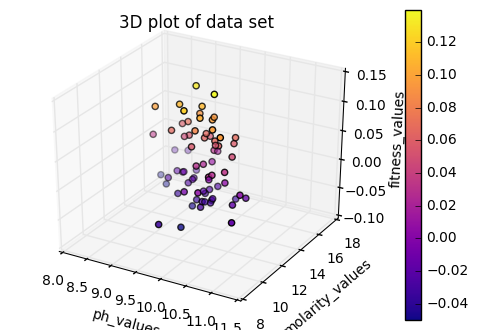

In [5]:
phs = XTrain[:, 0]
molarities = XTrain[:, 1]

# plot data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
my_3d_plot = ax.scatter(phs, molarities, YTrain, zdir='z', s=20, depthshade=True, c=YTrain, cmap='plasma')
ax.set_xlabel('ph_values')
ax.set_ylabel('molarity_values')
ax.set_zlabel('fitness_values')
plt.colorbar(my_3d_plot)
plt.title('3D plot of data set')
plt.show()

Creation of 2d gaussian process model - the set has been divided in a train a test set arbitrarily

In [6]:
x_train_set = XTrain
# print 'this is X TRAIN SET' + str(x_train_set)
y_train_set = YTrain
y_train_set_reshaped = np.reshape(y_train_set, (len(YTrain), 1)) # reshaping needed with the gpy library in use
# print np.shape(y_train_set_reshaped)
# print 'this is Y TRAIN SET' + str(len(y_train_set))

# x_test_set = XTrain[number_of_points:len(XTrain)]
# print 'this is X TEST SET' + str(x_test_set)
# y_test_set = YTrain[number_of_points:len(YTrain)]
# print 'this is Y TEST SET' + str(len(y_test_set))

# print 'THIS IS THE MEAN OF THE OBSERVATIONS: ' + str(np.mean(y_train_set_reshaped))

Creation of kernel to use in GP model and fitting of the model

In [7]:
kg = GPy.kern.RBF(input_dim=2, variance=0.5, lengthscale=0.7, ARD=True)

m = GPy.models.GPRegression(x_train_set, y_train_set_reshaped, kernel=kg, normalizer=False, noise_var=0.5)
print 'This is the regression model object: '
m



This is the regression model object: 


GP_regression.,value,constraints,priors
rbf.variance,0.5,+ve,
rbf.lengthscale,"(2,)",+ve,
Gaussian_noise.variance,0.5,+ve,


 /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


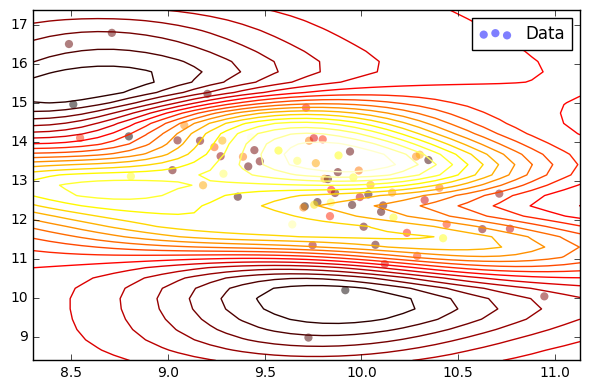

In [8]:
plotting_figure = m.plot()
GPy.plotting.show(plotting_figure, filename='GP model')

In [20]:
m.optimize(messages=True, max_f_eval=1000)  # fit the model
m.optimize_restarts(num_restarts=10)

Optimization restart 1/10, f = -111.307722959
Optimization restart 2/10, f = -111.307722952
Optimization restart 3/10, f = -111.307722959
Optimization restart 4/10, f = -111.307722951
Optimization restart 5/10, f = -111.307722958
Optimization restart 6/10, f = -111.307722959
Optimization restart 7/10, f = -111.307722948
Optimization restart 8/10, f = -111.307722959
Optimization restart 9/10, f = -111.307722959
Optimization restart 10/10, f = -111.307722958


In [21]:
plotting_figure_optimized = m.plot()
GPy.plotting.show(plotting_figure_optimized, filename='GP model fitting')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [22]:
# predicted_values_mean, predicted_values_var = m.predict(x_test_set)
# print predicted_values_mean, predicted_values_var